## Goal

Evaluate the LTV of clients groups who were attracted in different years, and choose a model for attracting and working with clients, which gives both more Profit and LTV (all 4 years used different models to attract and retain clients).

## Metrics and type of analysis

To solve this task, I will use cohort analysis and the LTV (Lifetime Value) metric.

## What is LTV?

LTV (Lifetime Value) is the gross profit that the average user will make over the lifetime of the product.

LTV must be calculated:
- Based on Gross Profit, not Revenue
- Using cohort analysis

### Definition for analysis in this case

<b> Customer action </b>: purchase by Order Date

<b> Cohort size  </b>: year

<b> Reporting period  </b>: 4 years, from 2014 to 2017

<b> Key metrics  </b>: LTV (which is calculated on the basis of Profit, not Revenue, in the entire existence of the cohort)

In [1]:
# add libraries
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment', None)

In [2]:
# add data
data = pd.read_excel("Sample - Superstore.xls")

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.tail(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9984,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9986,9987,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
data.describe(include='all', datetime_is_numeric=True)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,NaN,NaN,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
min,1.000000,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,2015-05-23 00:00:00,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,2016-06-26 00:00:00,2016-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,2017-05-14 00:00:00,2017-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000
max,9994.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,99301.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000


## Data Preparation

1. Check & Clean Duplicates

In [7]:
data.duplicated().sum()

0

## Performace of Cohort Analysis

1. Leave only the columns necessary for analysis

In [8]:
profit = data[["Order Date", "Customer ID", "Profit"]]
profit.head()

,Order Date,Customer ID,Profit
0,2016-11-08,CG-12520,41.9136
1,2016-11-08,CG-12520,219.5820
2,2016-06-12,DV-13045,6.8714
3,2015-10-11,SO-20335,-383.0310
4,2015-10-11,SO-20335,2.5164


In [9]:
profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order Date   9994 non-null   datetime64[ns]
 1   Customer ID  9994 non-null   object        
 2   Profit       9994 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 234.4+ KB


2. Sorting by order date

In [10]:
profit.sort_values(by=['Order Date'], inplace = True, ignore_index = True)
profit.head()

,Order Date,Customer ID,Profit
0,2014-01-03,DP-13000,5.5512
1,2014-01-04,PO-19195,4.2717
2,2014-01-04,PO-19195,-64.7748
3,2014-01-04,PO-19195,-5.4870
4,2014-01-05,MB-18085,4.8840


3. Add year of order

In [11]:
profit['Order_Year'] = profit['Order Date'].dt.to_period("Y")

In [12]:
profit.head()

,Order Date,Customer ID,Profit,Order_Year
0,2014-01-03,DP-13000,5.5512,2014
1,2014-01-04,PO-19195,4.2717,2014
2,2014-01-04,PO-19195,-64.7748,2014
3,2014-01-04,PO-19195,-5.4870,2014
4,2014-01-05,MB-18085,4.8840,2014


3. Add month of purchase

In [13]:
cohorts_year = profit.groupby('Customer ID')['Order_Year']
profit['Cohort_Year'] = cohorts_year.transform('min')
profit.head()

,Order Date,Customer ID,Profit,Order_Year,Cohort_Year
0,2014-01-03,DP-13000,5.5512,2014,2014
1,2014-01-04,PO-19195,4.2717,2014,2014
2,2014-01-04,PO-19195,-64.7748,2014,2014
3,2014-01-04,PO-19195,-5.4870,2014,2014
4,2014-01-05,MB-18085,4.8840,2014,2014


In [14]:
profit.tail()

,Order Date,Customer ID,Profit,Order_Year,Cohort_Year
9989,2017-12-30,JM-15580,-0.6048,2017,2016
9990,2017-12-30,PO-18865,19.7910,2017,2014
9991,2017-12-30,PO-18865,2.7279,2017,2014
9992,2017-12-30,EB-13975,4.5188,2017,2016
9993,2017-12-30,PO-18865,12.1176,2017,2014


4. Number of customers in every cohort

In [15]:
cohorts_customers = profit.groupby('Cohort_Year')['Customer ID'].nunique()
cohorts_customers

Cohort_Year
2014    595
2015    136
2016     51
2017     11
Freq: A-DEC, Name: Customer ID, dtype: int64

5. Profit in every cohort

In [16]:
cohorts_profit = profit.groupby(['Cohort_Year', 'Order_Year'])['Profit'].sum().reset_index()
cohorts_profit

,Cohort_Year,Order_Year,Profit
0,2014,2014,49543.9741
1,2014,2015,47388.9067
2,2014,2016,62249.5166
3,2014,2017,60616.1865
4,2015,2015,14229.6970
5,2015,2016,11605.6579
6,2015,2017,20557.6347
7,2016,2016,7939.9998
8,2016,2017,10459.2809
9,2017,2017,1806.1675


6. calculate cumulative profit

In [17]:
cohorts_profit['Sum_profit'] = 0
lst_cohort = cohorts_profit.Cohort_Year.unique()

for cohort in lst_cohort:
    for row in range(len(cohorts_profit)):
        if cohorts_profit.Cohort_Year[row] == cohort:
            if row == 0 or row == 4 or row == 7 or row == 9:
                cohorts_profit['Sum_profit'][row] = cohorts_profit['Profit'][row]
            else:
                cohorts_profit['Sum_profit'][row] = cohorts_profit['Sum_profit'][row-1]+cohorts_profit['Profit'][row]

In [18]:
cohorts_profit

,Cohort_Year,Order_Year,Profit,Sum_profit
0,2014,2014,49543.9741,49543.9741
1,2014,2015,47388.9067,96932.8808
2,2014,2016,62249.5166,159182.3974
3,2014,2017,60616.1865,219798.5839
4,2015,2015,14229.6970,14229.6970
5,2015,2016,11605.6579,25835.3549
6,2015,2017,20557.6347,46392.9896
7,2016,2016,7939.9998,7939.9998
8,2016,2017,10459.2809,18399.2807
9,2017,2017,1806.1675,1806.1675


7. Add index of year for cohort

In [19]:
cohorts_profit['Index'] = [0, 1, 2, 3, 0, 1, 2, 0, 1, 0]
cohorts_profit

,Cohort_Year,Order_Year,Profit,Sum_profit,Index
0,2014,2014,49543.9741,49543.9741,0
1,2014,2015,47388.9067,96932.8808,1
2,2014,2016,62249.5166,159182.3974,2
3,2014,2017,60616.1865,219798.5839,3
4,2015,2015,14229.6970,14229.6970,0
5,2015,2016,11605.6579,25835.3549,1
6,2015,2017,20557.6347,46392.9896,2
7,2016,2016,7939.9998,7939.9998,0
8,2016,2017,10459.2809,18399.2807,1
9,2017,2017,1806.1675,1806.1675,0


8. Create table for cohort analysis

In [20]:
cohort_by_year = cohorts_profit.pivot(index='Cohort_Year',columns='Index',values='Sum_profit').fillna(0)
cohort_by_year

Index,0,1,2,3
Cohort_Year,,,,
2014,49543.9741,96932.8808,159182.3974,219798.5839
2015,14229.6970,25835.3549,46392.9896,0.0000
2016,7939.9998,18399.2807,0.0000,0.0000
2017,1806.1675,0.0000,0.0000,0.0000


In [21]:
# add a column with the number of people in each cohort
cohort_by_year.insert(0, 'N_customers', cohorts_customers)
cohort_by_year

Index,N_customers,0,1,2,3
Cohort_Year,,,,,
2014,595,49543.9741,96932.8808,159182.3974,219798.5839
2015,136,14229.6970,25835.3549,46392.9896,0.0000
2016,51,7939.9998,18399.2807,0.0000,0.0000
2017,11,1806.1675,0.0000,0.0000,0.0000


## LTV 

In [22]:
# create LTV table
LTV = pd.DataFrame()

for col in cohort_by_year:
    if col != 'N_customers':
        LTV[col] = round((cohort_by_year[col]/cohort_by_year['N_customers']), 2)

In [23]:
LTV

,0,1,2,3
Cohort_Year,,,,
2014,83.27,162.91,267.53,369.41
2015,104.63,189.97,341.12,0.00
2016,155.69,360.77,0.00,0.00
2017,164.20,0.00,0.00,0.00


### LTV Heatmap 

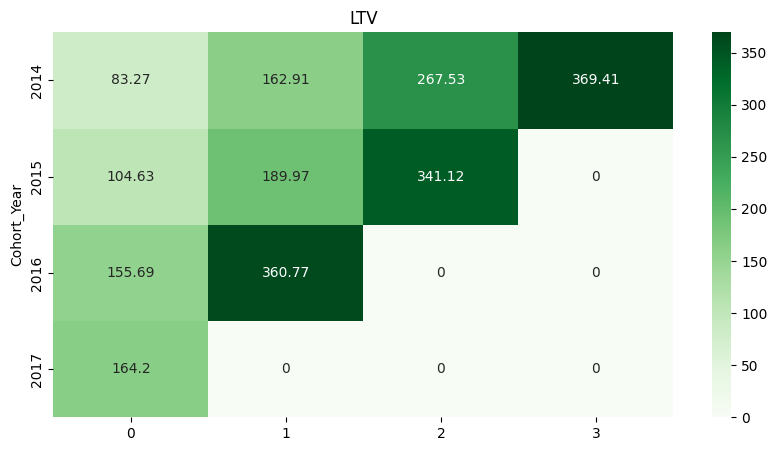

In [24]:
plt.figure(figsize=(10, 5))
plt.title('LTV')
sns.heatmap(data=LTV,annot = True,fmt = 'g', cmap = 'Greens')
plt.show()

- In 2015 the store clearly changed its policy for attracting new customers compared to 2014 -> a decrease in the number of new customers by almost 80%. But as we can see from the LTV indicator, the quality of each new customer attracted became better (growth LTV from 83.27 to 104.63)


- in 2016 new customers in the first year of purchases LTV is even better = 155.69, and in 2017 it is the highest = 164.2


- The 2016 cohort for the second year of purchases shows a better LTV than the 2014 cohort for the fourth year of purchases -> that is, the store managed to find channels to attract new customers that yield high returns per customer.

### BUT!

- At the same time, we see a decrease in total Profit with an increase in LTV in each new cohort because the store has greatly reduced the flow of new customers, and this has reduced the total Profit (although it has improved LTV)

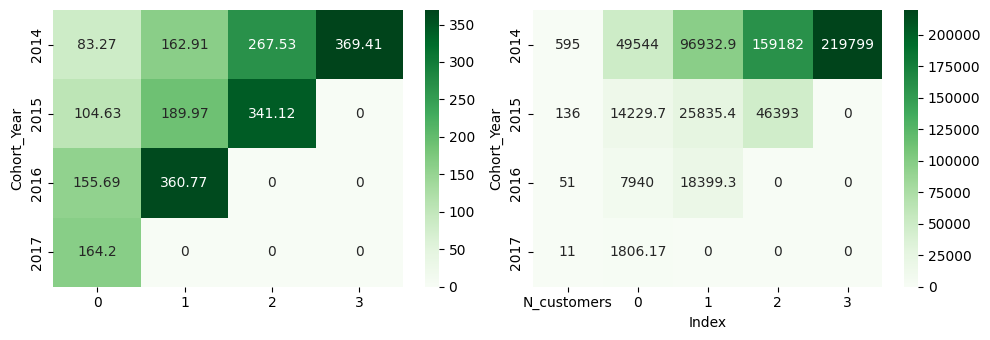

In [25]:
plt.rcParams["figure.figsize"] = [10.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax =plt.subplots(1,2)
sns.heatmap(data=LTV,annot = True,fmt = 'g', cmap = 'Greens', ax=ax[0])
sns.heatmap(data=cohort_by_year,annot = True,fmt = 'g', cmap = 'Greens', ax=ax[1])
plt.show()

## Conclusion

The store should not only focus on the quality of the flow of new customers (i.e. high LTV), but also the number of new customers -> it is worth trying new channels to attract more customers